## *Can you guess what is the secret of academic success?* 

We have an excellent set which contains information about the life of students of mathematical courses and their academic success. As for me, I am very interested to examine in detail the information about the students and find out what influences their grades the most. The owner of the dataset suggests paying attention to the amount of alcohol consumed by students. This is a really interesting topic. Let's start.


## Table of Contents
we have already data so we will start with Data understanding then see what questions we can bring from this data 
<ul>
<li><a href="#intro">Data Understanding</a></li>
<li><a href="#bus">Business Understanding</a></li>
<li><a href="#eda">Exploratory Data Analysis above each Answer</a></li>
<li><a href="#conclusions">Conclusions bwlow each Question </a></li>
</ul>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
COLOR = 'Purple'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    return summary

In [5]:
! ls

200w.webp                         Student Alcohol Consumption.ipynb
Q1.png                            giphy (1).gif
Q2.png                            giphy (2).gif
Q3-1.png                          giphy (3).gif
Q3.png                            giphy (4).gif
Q4-2.png                          giphy (5).gif
Q4.png                            giphy.gif
Q5-1.png                          graph.png
Q5.png                            student-mat.csv
Q6-1.png                          student-por.csv
Q6.png


In [6]:
data = pd.read_csv('student-mat.csv')

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Lots of data. This is very encouraging! I can assume that many of the data obtained by questioning.

<a id='intro'></a>

## Data Understanding

** Featureset Exploration **

* **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex**: student's sex (binary: 'F' - female or 'M' - male)
* **age**: student's age (numeric: from 15 to 22)
* **address**:student's home address type (binary: 'U' - urban or 'R' - rural)
* **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart). 
* **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) .
* **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
* **traveltime**: home to school travel time (numeric: 1 - 1 hour). 
* **studytime**: weekly study time (numeric: 1 - 10 hours).
* **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
* **schoolsup**: extra educational support (binary: yes or no)
* **famsup**: family educational support (binary: yes or no)
* **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* **activities**: extra-curricular activities (binary: yes or no)
* **nursery**: attended nursery school (binary: yes or no).
* **higher**: wants to take higher education (binary: yes or no)
* **internet**: Internet access at home (binary: yes or no)
* **romantic**: with a romantic relationship (binary: yes or no)
* **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
* **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
* **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **health**: current health status (numeric: from 1 - very bad to 5 - very good)
* **absences**: number of school absences (numeric: from 0 to 93)
* **G1**: first period grade (numeric: from 0 to 20)
* **G2**: second period grade (numeric: from 0 to 20)
* **G3**: final grade (numeric: from 0 to 20, output target)

In [8]:
# Total number of records
n_records_math = data.shape[0]
# Print the results
print("Total number of records: {}".format(n_records_math))

Total number of records: 395


In [9]:
resumetable(data)

Dataset Shape: (395, 33)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,school,object,0,2,GP,GP,GP
1,sex,object,0,2,F,F,F
2,age,int64,0,8,18,17,15
3,address,object,0,2,U,U,U
4,famsize,object,0,2,GT3,GT3,LE3
5,Pstatus,object,0,2,A,T,T
6,Medu,int64,0,5,4,1,1
7,Fedu,int64,0,5,4,1,1
8,Mjob,object,0,5,at_home,at_home,at_home
9,Fjob,object,0,5,teacher,other,other


For broad perspective lets look at first correlation of features.
- Correlation between features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 <a list of 16 Text yticklabel objects>)

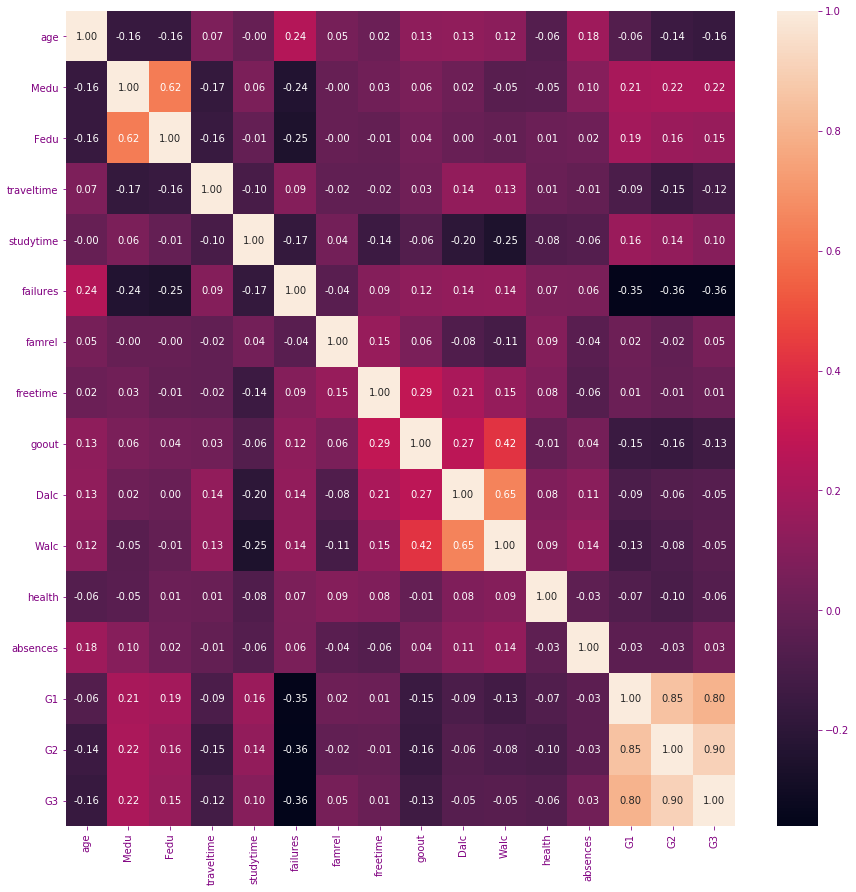

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

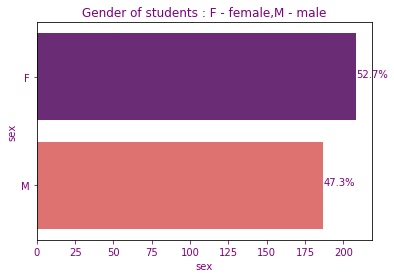

In [11]:

ax = sns.countplot(y="sex", data=data ,palette="magma")
plt.title('Gender of students : F - female,M - male')
plt.xlabel('sex')

total = len(data['address'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The number of girls is a little more. We will come back to the gender of students when we consider the final grades of students and so on.
- Now let's pay attention to the age of students. After all, we assume, for example, that the younger the student the less likely that he uses alcohol.

In [12]:
ages = data["age"].value_counts()
labels = (np.array(ages.index))
sizes = (np.array((ages / ages.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")

And so, basically we are dealing with students 15-18 years. The most beautiful, but very often is a difficult age. Teenagers want to relax more with friends and learn less math :)

<a id='bus'></a>

## Business Understanding

Questions : 
   <ul>
   <li><a href="#Q1"> 1- Do you think when you spending more hours in studies, is that will make you get higher grades than those who do the opposite of this? </a></li>
    
   <li><a href="#Q2"> 2- Do you think students in good health get higher grades than those who have bad  health?</a></li>
  <li> <a href="#Q3"> 3- students that get grades above than average,  what their parents working?</a></li>
   <li><a href="#Q4"> 4- do you think alcohol affecting on grades rate?</a></li>
  <li><a href="#Q5"> 5- if you have access to the internet is this make you get a higher degree than those who don't have access to the internet? (yes I'm shocked like you)</a></li>
  <li> <a href="#Q6"> 6- Do you think when students who live in the city have a lower Absence rate than those who live in the village?  </a></li>
   <li><a href="#Q7"> 7-Is there any effect of the Romantic relationship whether positive or negative on the final grades rate? </a></li>
   <li><a href="#Q8"> 8- Do you think when parents pay for their children on extra courses will make them get higher final grade than those who their parent doesn't pay </a></li>
  <li> <a href="#Q9"> 9- Do you think the student's desire to get higher education is an important factor in success? </a></li>
   <li><a href="#Q10"> 10- when parents of students are together (not divorced) that will help them to get high grades? </a></li>
   <li><a href="#Q11"> 11- when the quality of relationships in the family of students is good that will help them to get high grades? </a></li>
   </ul>

Then let's see how many hours a week students spend on their studies.

In [13]:
data['st_time'] = np.nan
df = [data]

for col in df:
    col.loc[col['studytime'] == 1 , 'st_time'] = 'Low'
    col.loc[col['studytime'] == 2 , 'st_time'] = 'Medium'
    col.loc[col['studytime'] == 3, 'st_time'] = 'High'
    col.loc[col['studytime'] == 4, 'st_time'] = 'Very high '  
 
labels = data["st_time"].value_counts().keys().tolist()
amount = data["st_time"].value_counts().tolist()

colors = ["cyan", "green", "red", "Blue"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
dt = [trace]
layout = go.Layout(title="Study time")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename='pie')



>Most of the students in the "Medium" group. It would be better if we had the exact number of hours for each student. I think a student in a "high" group is a diligent student. "low" group is not always enough. But we can pay attention to the impact of the number of hours spent on a study on the final grade of the student.


Text(0, 0.5, 'studytime')

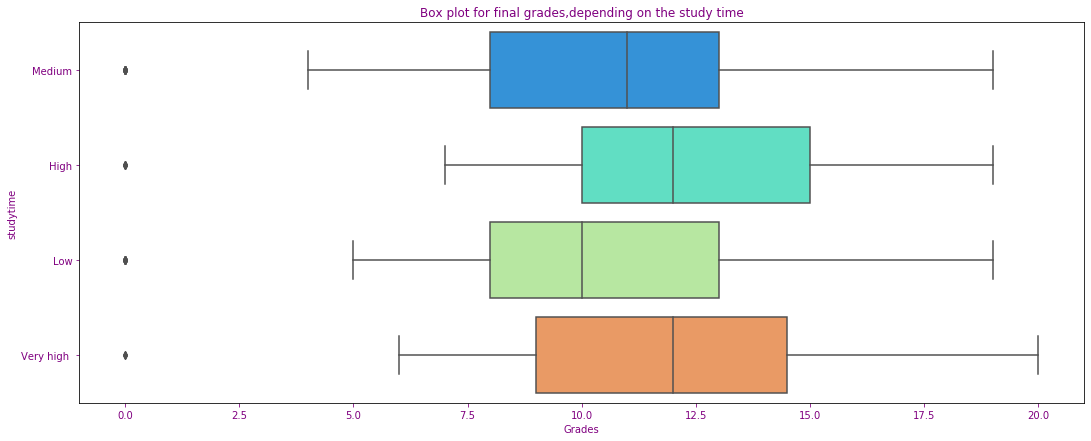

In [14]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="st_time", x="G3", data = data ,  orient="h", palette = 'rainbow',)
plt.xlabel('Grades')
plt.ylabel('studytime')

<a id='Q1'></a>

###### Answer  Q 1 : Do you think when you spending more hours in studies, is that will make you get higher grades than those who do the opposite of this?

>The lowest average result is shown by students who in group "Low". Of course! Especially when it comes to mathematics. Few students in the group "Very high". But they show a very good result.. Sometimes we're all lazy. But we must try to find time to study and good grades will become stable.
Interestingly, students in group "High" got an average alMost equal to group "Very high" and In general, their grades are better

>Advice :
Learn diligently, but do not reach the irrational stage of negligence or diligence. As we see rational diligent students, they are the highest students obtaining grades. I expect that the rationale for this analysis is that the nature of the human being needs time of rest to reach the highest stages of giving

We have information about the student's place of residence: city or village. Let's see. This may be useful to us in the future. Perhaps students living in the city are much more likely to attend parties with alcohol or are busy with more interesting things than studying. Or students living in villages may be too lazy to get to school and miss classes. Also display the time that students spend on the way to school ( 1 - very close, 4 - very far).

In [15]:
data['address'] = data['address'].replace(['U'],'city')
data['address'] = data['address'].replace(['R'],'village')

In [16]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

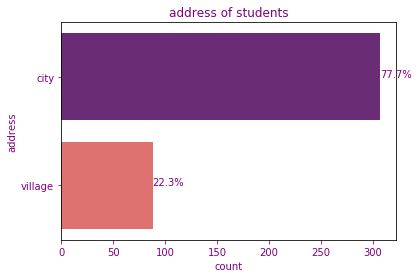

In [17]:
ax = sns.countplot(y="address", data=data ,palette="magma")
plt.title('address of students')
plt.xlabel('count')

total = len(data['address'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Most of the students live in the city.

Text(0.5, 1, 'Students address')

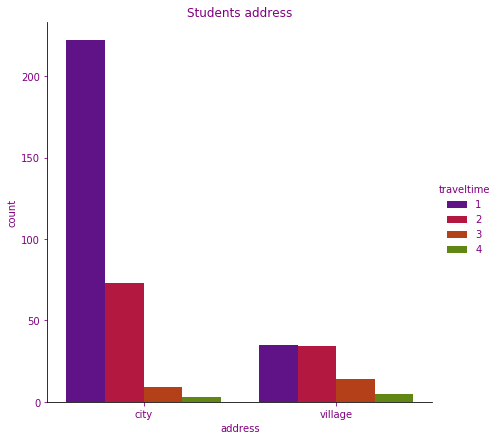

In [18]:
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=data, height = 6)
plt.title("Students address")

Few students take long to get to school. But still, let's see if this affects the number of absences.

the distance between home and school For most of the students who are living in the city it's very close, on the other hand, who are living in a village not the most of them very close to the school  

let's see if this affects the number of absences.

Text(0.5, 1.0, 'Distribution of absences for students who live in village')

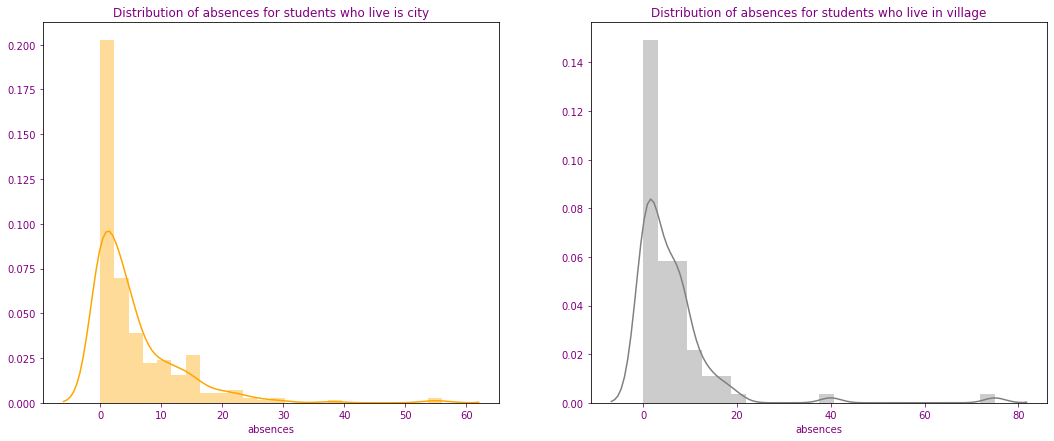

In [19]:
f= plt.figure(figsize=(18,7))

ax=f.add_subplot(121)
sns.distplot(data[(data.address == 'city')]["absences"],color='orange',ax=ax)
ax.set_title('Distribution of absences for students who live is city')

ax=f.add_subplot(122)
sns.distplot(data[(data.address == 'village')]['absences'],color='gray',ax=ax)
ax.set_title('Distribution of absences for students who live in village')

Yet among the students living in the village there are people with a lot of absences. But while we can not say for sure that this is due to the fact that the student does not live in the city. But of course this may be due to traffic jams on the road or not a very good transport schedule.

<a id='Q6'></a>

###### Answer  Q6 : Do you think when students live in the city have lower Absence rate than those who live in the village? 

>Yet among the students living in the village there are people with a lot of absences. But while we can not say for sure that this is due to the fact that the student does not live in the city. But of course this may be due to traffic jams on the road or not a very good transport schedule.

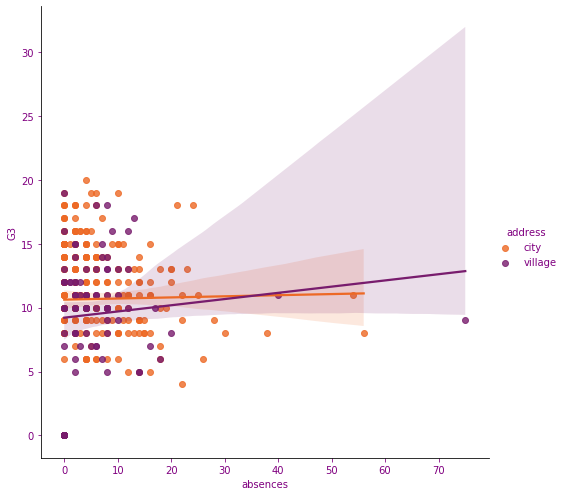

In [20]:
sns.lmplot(x="absences", y="G3",hue = 'address',data=data, palette = 'inferno_r', size = 7)

But let's study students absences in more detail. We have information about the romantic relationships of students: there is a relationship or not. Given the age of our students, we can assume that love has an important place in their lives. 

Let's see if the presence of love and relationships affects the number of absences.

Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

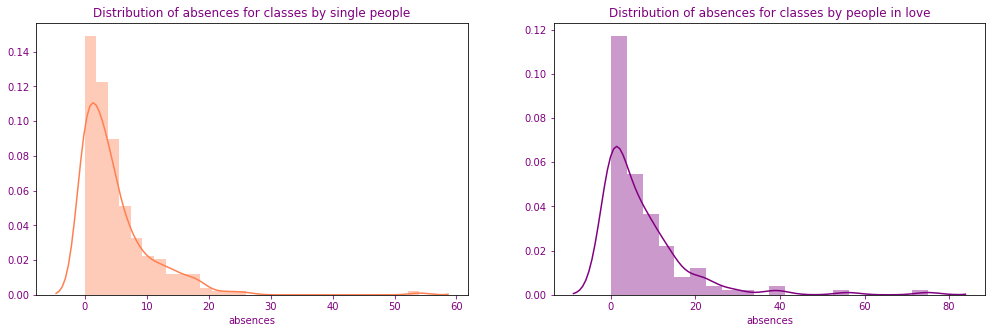

In [21]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["absences"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')

"Lovers do not notice the clock." Single people miss fewer classes. But how can we be mad at teenagers for being in love? 

Let's see if this affects the final grade.

Text(0.5, 1.0, 'Distribution of grades in people in love')

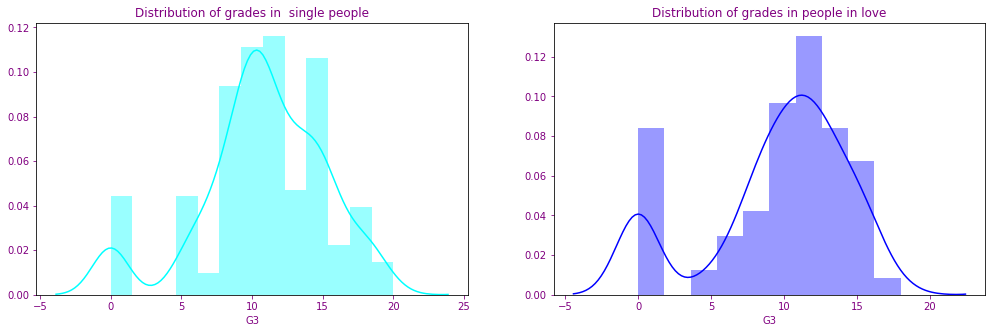

In [22]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades in  single people')

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of grades in people in love')

The final grades of single students are slightly higher than those who are in a romantic relationship. Of course this is due to the fact that teenagers in love want to spend more time with girlfriend or boyfriend than with a textbook in mathematics. 

<a id='Q7'></a>

###### Answer  Q7 : Is there any effect of the Romantic relationship whether positive or negative on the final grades rate? 

>The final grades of single students are slightly higher than those who are in a romantic relationship. Of course this is due to the fact that teenagers in love want to spend more time with girlfriend or boyfriend than with a textbook in mathematics. 

Let's count the number of single students and those who are in a relationship.

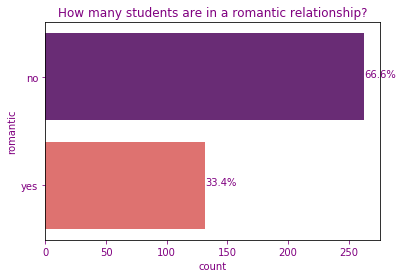

In [23]:
ax = sns.countplot(y="romantic", data=data ,palette="magma")
plt.title('How many students are in a romantic relationship?')
plt.xlabel('count')

total = len(data['romantic'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Now consider one very important thing. Students health! In our sample of very young teenagers and I hope that they all have excellent health.

In [24]:
labels = data["health"].value_counts().keys().tolist()
amount = data["health"].value_counts().tolist()

colors = ["coral","lightgreen","pink","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Current health status (numeric: from 1 - very bad to 5 - very good)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'h_chart')

I am so happy, most of the student their health is good

Text(0, 0.5, 'health')

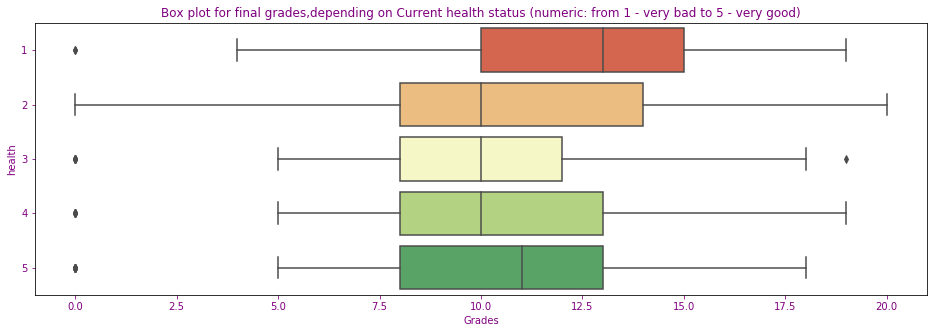

In [25]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on Current health status (numeric: from 1 - very bad to 5 - very good)")
sns.boxplot(y="health", x="G3", data = data , orient="h", palette = 'RdYlGn')
plt.xlabel('Grades')
plt.ylabel('health')

<a id='Q2'></a>

###### Answer  Q 2 : Do you think when you eating well and doing sports will get higher grades than those who do the opposite of this?

> Interesting situation. In our enrollment, 66 students have very poor health. But nevertheless their final estimates are quite high. I hope that they think not only about their success in school but also about health! Also, students with very good health have high final grades. 

Now look at the absenteeism.

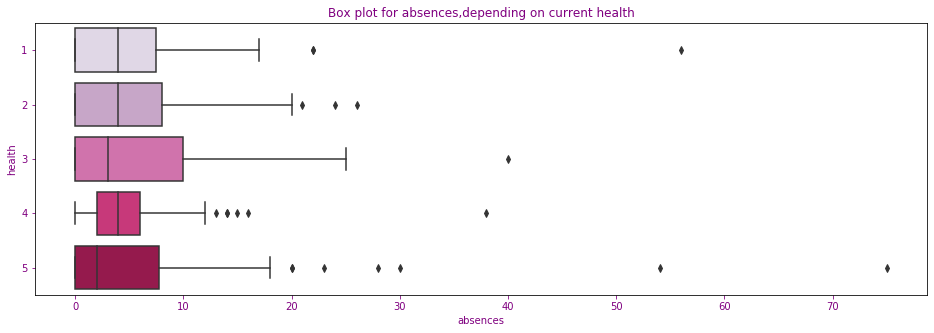

In [26]:
plt.figure(figsize=(16,5))
plt.title("Box plot for absences,depending on current health")
sns.boxplot(y="health", x="absences", data = data , orient="h", palette = 'PuRd')

There is no tangible connection between the level of health of the student and the number of absences to classes.
But here you can see that students with high final grades miss less classes :) 

Since we are talking about health will look at alcohol consumption by students.

We have data on the amount of alcohol consumed by students on weekdays("Dalc") and weekends("Walc"). The main thing we are interested in is whether the amount of alcohol consumed affects success in school. Let's see! 

Let's start with alcohol consumption on weekdays.

In [27]:
labels = data["Dalc"].value_counts().keys().tolist()
amount = data["Dalc"].value_counts().tolist()

colors = ["pink","lightgreen","white","cyan","gray"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'rt')

Most students prefer to spend a week sober or almost without alcohol. But still there is someone who likes to drink on a weekday.

 Let's see if that affects student absences.

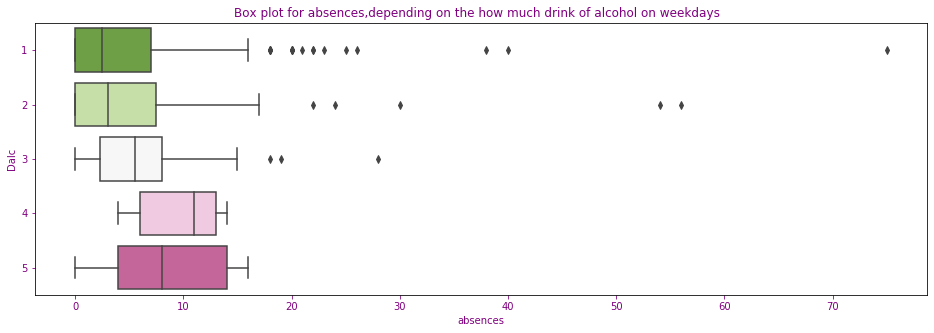

In [28]:
plt.figure(figsize=(16,5))
plt.title("Box plot for absences,depending on the how much drink of alcohol on weekdays  ")
sns.boxplot(y="Dalc", x="absences", data = data , orient="h", palette = 'PiYG_r')

Text(0.5, 1.0, 'Distribution of absences for people who consume little alcohol on weekdays')

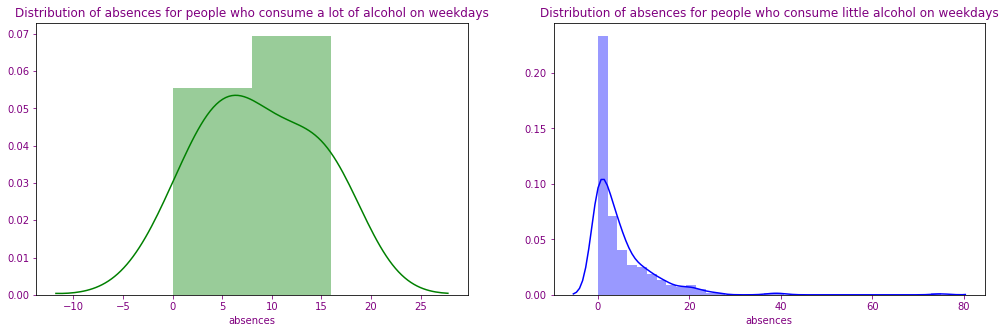

In [29]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc == 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of absences for people who consume a lot of alcohol on weekdays')


ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc == 1)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of absences for people who consume little alcohol on weekdays')

Drinking alcohol on weekdays it's a bad idea as we can see most of the students that have a lot of absent are drinking so much on weekdays

 Let's see if that affects student grades.

Text(0, 0.5, 'health')

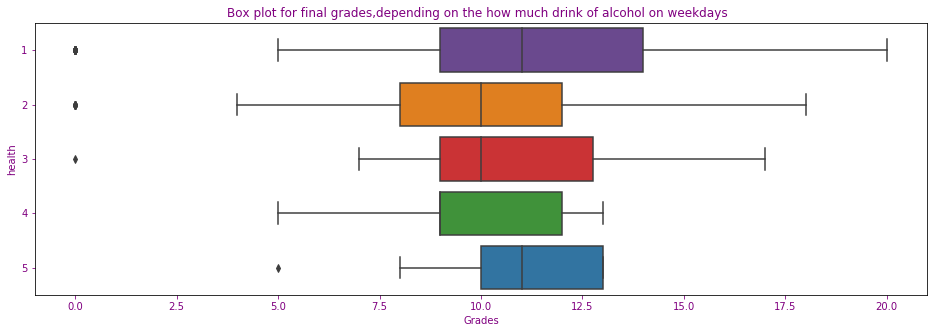

In [30]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on the how much drink of alcohol on weekdays  ")
sns.boxplot(y="Dalc", x="G3", data = data , orient="h", palette = 'Paired_r')
plt.xlabel('Grades')
plt.ylabel('health')

Text(20.625, 0.5, 'Grades')

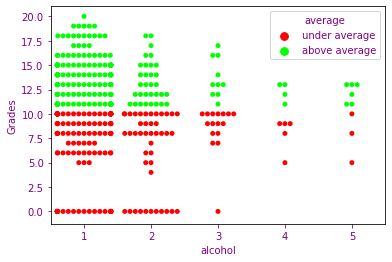

In [31]:
ave = sum(data.G3)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')
plt.xlabel('alcohol')
plt.ylabel('Grades')

As it can be seen swarm plot, student who takes highest grade consumes alcohol only 2 times in a week.

Text(0.5, 1.0, 'Distribution of final grades for people who consume little alcohol on weekdays')

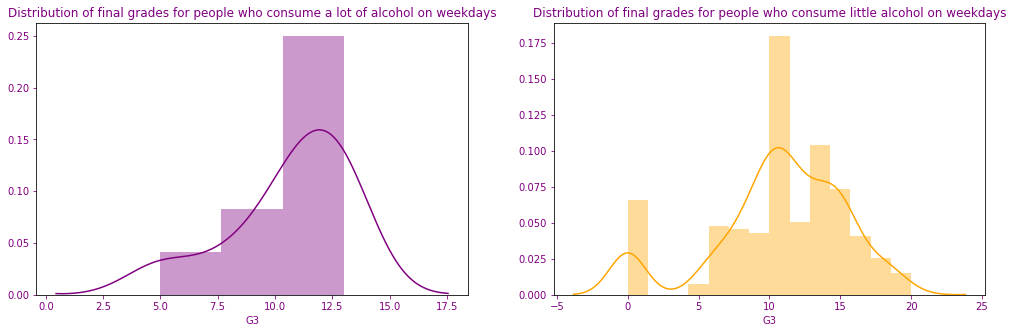

In [32]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc == 5)]["G3"],color='Purple',ax=ax)
ax.set_title('Distribution of final grades for people who consume a lot of alcohol on weekdays')


ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc == 1)]['G3'],color='orange',ax=ax)
ax.set_title('Distribution of final grades for people who consume little alcohol on weekdays')

We can see the final grades of students who love a drink on weekdays are significantly lower 

<a id='Q4'></a>

###### Answer  Q4: Do you think alcohol affecting on grades rate?

> Drinking alcohol on weekdays it's a bad idea as we can see most of the students that have a lot of absent are drinking so much on weekdays ,  We can see the final grades of students who love a drink on weekdays are significantly lower and student who takes highest grade consumes alcohol only 2 times in a week.

In [33]:
labels = data["Walc"].value_counts().keys().tolist()
amount = data["Walc"].value_counts().tolist()

colors = ["yellow","cyan","green","orange","gray"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 't')

Of course the situation has changed . On weekends , more students like to drink , I wonder what the situation will be with the absesnt and final grades 

let,s see the effect on the absence rate 

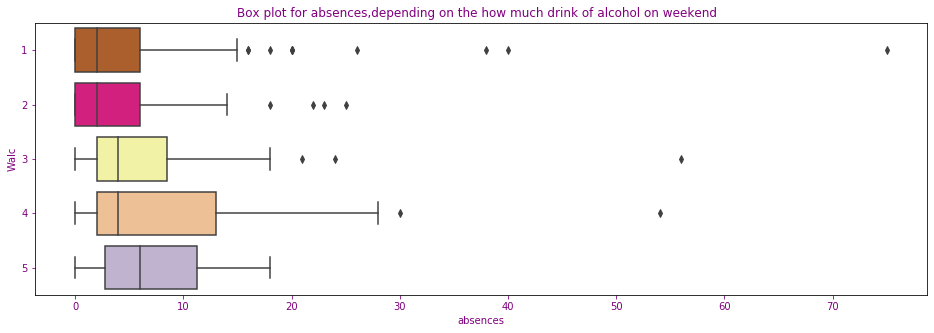

In [34]:
plt.figure(figsize=(16,5))
plt.title("Box plot for absences,depending on the how much drink of alcohol on weekend  ")
sns.boxplot(y="Walc", x="absences", data = data , orient="h", palette = 'Accent_r')

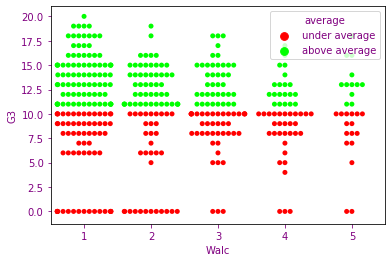

In [35]:
ave = sum(data.G3)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.swarmplot(x='Walc', y = 'G3', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

Text(0.5, 1.0, 'Distribution of Absence for people who consume little alcohol on weekend')

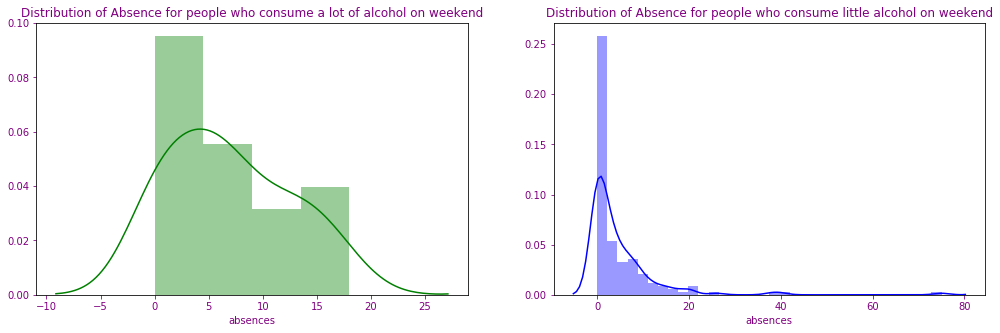

In [36]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Walc == 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of Absence for people who consume a lot of alcohol on weekend')


ax=f.add_subplot(122)
sns.distplot(data[(data.Walc == 1)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of Absence for people who consume little alcohol on weekend')

As we can see the absence rate of the students who prefer to drink too much on the weekend is more than those who prefer to drink very low. 

let,s see the effect on the final grades

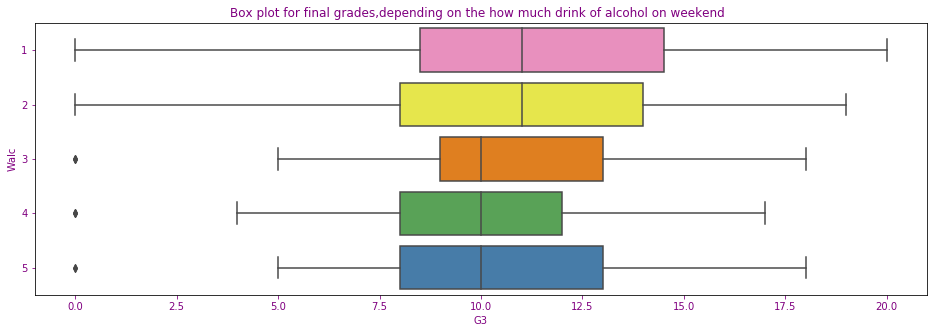

In [37]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on the how much drink of alcohol on weekend  ")
sns.boxplot(y="Walc", x="G3", data = data , orient="h", palette = 'Set1_r')

Text(0.5, 1.0, 'Distribution of final grades for people who consume little alcohol on weekend')

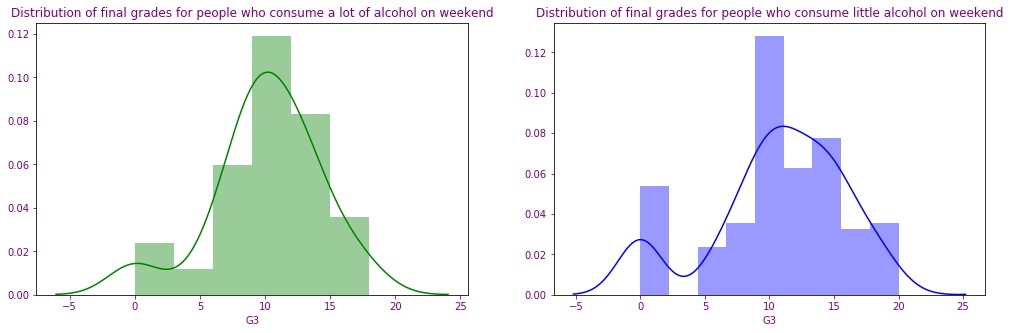

In [38]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Walc == 5)]["G3"],color='green',ax=ax)
ax.set_title('Distribution of final grades for people who consume a lot of alcohol on weekend')


ax=f.add_subplot(122)
sns.distplot(data[(data.Walc == 1)]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of final grades for people who consume little alcohol on weekend')

Um , Even if you drink too much on the weekend it,s will effect on your grades at scool , As we can see the final gardes of the students who prefer to drink too much on the weekend is less than those who prefer to drink very low. 

I propose to consider one more important thing - additional paid courses. It is good when a student wants to increase his knowledge and parents paid for courses, this may tell us about the social, financial status of the family . 

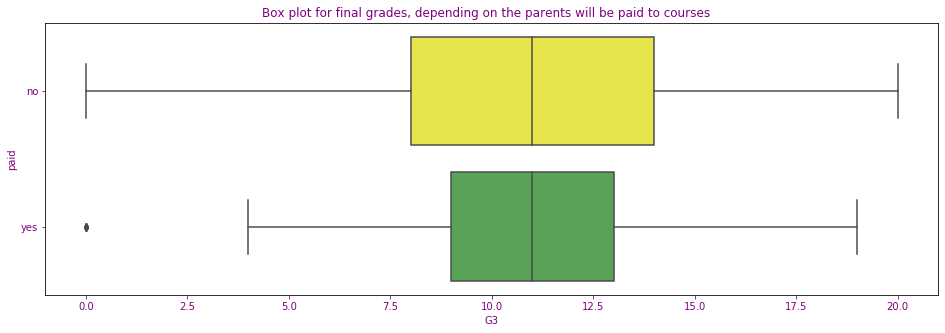

In [39]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades, depending on the parents will be paid to courses   ")
sns.boxplot(y="paid", x="G3", data = data , orient="h", palette = 'Set1_r')

Text(0.5, 1.0, 'Distribution of grades for students who do not have additional paid classes')

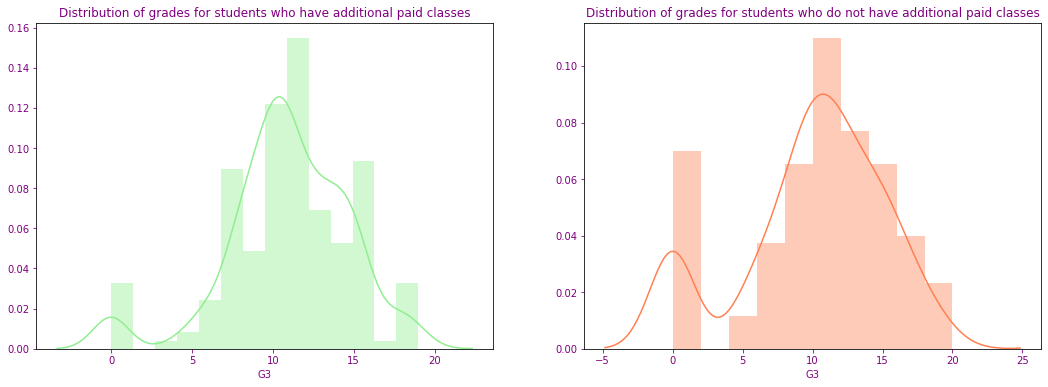

In [40]:
f= plt.figure(figsize=(18,6))

ax=f.add_subplot(121)
sns.distplot(data[(data.paid == 'yes')]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for students who have additional paid classes')

ax=f.add_subplot(122)
sns.distplot(data[(data.paid == 'no')]['G3'],color='coral',ax=ax)
ax.set_title('Distribution of grades for students who do not have additional paid classes')

there is no tangible connection between whether students have additional paid classes or not and the final grades rate

<a id='Q8'></a>

###### Answer  Q8 : Do you think when parents pay for their children on extra courses will make them get higher final grade than those who their parent doesn't pay 

>there is no tangible connection between whether students have additional paid classes or not and the final grades rate

let's move to another Curious question ، we have information about the student's desire to get higher education in the future , this is useful information dose the desire to get higher education influence the final grades  

Text(0.5, 1, 'How many students want to ger higher education?')

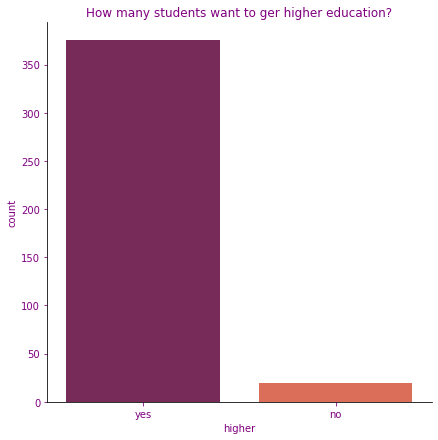

In [41]:
sns.catplot(x="higher", kind="count",palette="rocket", data=data, height = 6)
plt.title("How many students want to ger higher education?")

I am happy to see that almost all students want to get higher education. And I hope that the field of Data science :D

Text(0.5, 1.0, 'Distribution of grades for students who does not want to get higher education')

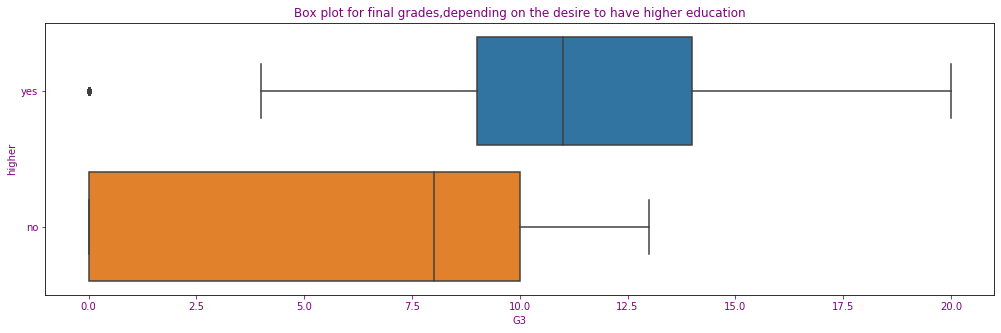

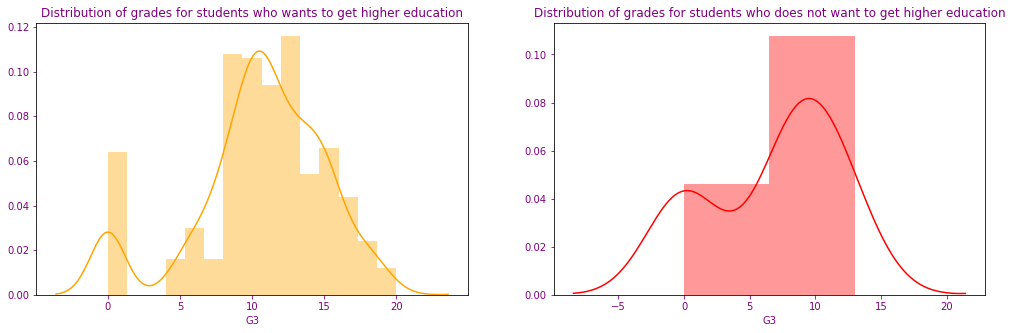

In [42]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the desire to have higher education")
sns.boxplot(y="higher", x="G3", data = data , orient="h", palette = 'tab10')

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.higher == 'yes')]["G3"],color='orange',ax=ax)
ax.set_title('Distribution of grades for students who wants to get higher education')

ax=f.add_subplot(122)
sns.distplot(data[(data.higher == 'no')]['G3'],color='red',ax=ax)
ax.set_title('Distribution of grades for students who does not want to get higher education')

The desire to get highr education stimulte student to get higher grades. 

<a id='Q9'></a>

###### Answer  Q9 : Do you think the student's desire to get higher education is an important factor in success? 

>The desire to get highr education stimulte student to get higher grades. 

Of course I did not forget to pay attention to the presence of the Internet at the student's home. Nowadays, the Internet is very important. Quick access to information or the ability to find a solution to the problem without a long search in the textbooks: D

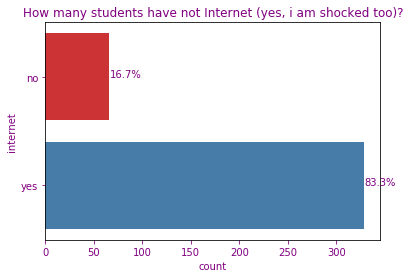

In [43]:
ax = sns.countplot(y="internet", data=data ,palette="Set1")
plt.title("How many students have not Internet (yes, i am shocked too)?")
plt.xlabel('count')

total = len(data['internet'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

First, let's see whether the availability of the Internet affects the number of hours students spend on their studies.

In [44]:
time1 =data[(data.internet == 'no')].st_time.value_counts()
labels = (np.array(time1.index))
sizes = (np.array((time1 / time1.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students without access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time1")

In [45]:
time2 =data[(data.internet == 'yes')].st_time.value_counts()
labels = (np.array(time2.index))
sizes = (np.array((time2 / time2.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students with access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time2")

I'm shocked . they spend leess time on studies ! Are these students geniuses or lazy??

Text(0.5, 1.0, 'Distribution of grades for students who does not have access to the internet')

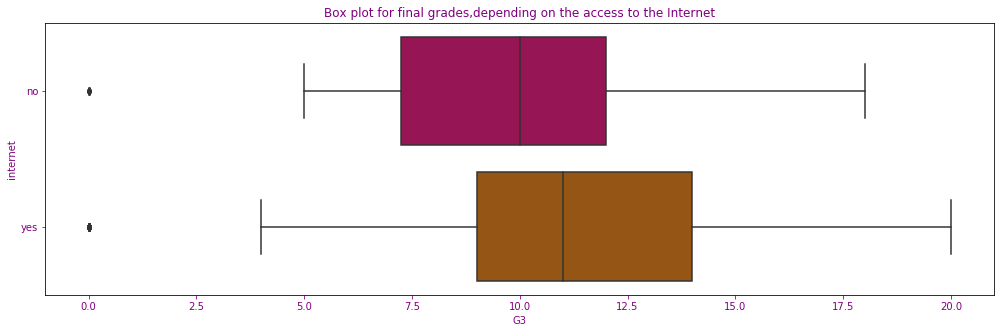

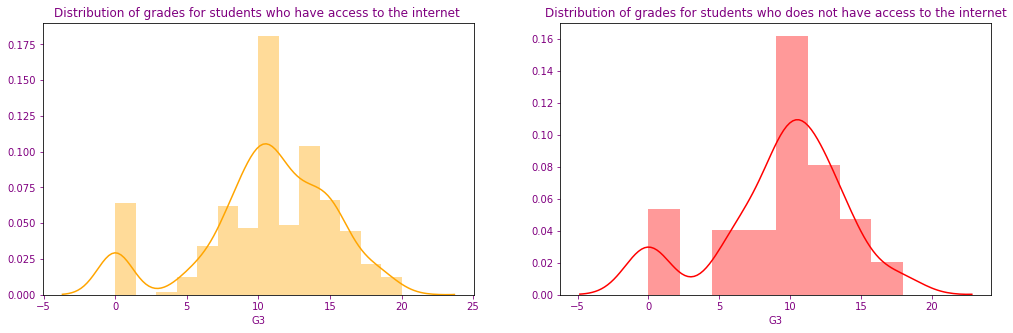

In [46]:

plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the access to the Internet")
sns.boxplot(y="internet", x="G3", data = data , orient="h", palette = 'brg')

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.internet == 'yes')]["G3"],color='orange',ax=ax)
ax.set_title('Distribution of grades for students who have access to the internet ')

ax=f.add_subplot(122)
sns.distplot(data[(data.internet == 'no')]['G3'],color='red',ax=ax)
ax.set_title('Distribution of grades for students who does not have access to the internet')

there is a different rate in final grades between students who have access to the internet and Those who are don't have access,  but it,s not what I have excepted, I expected it,s will be significantly different

<a id='Q5'></a>

###### Answer  Q5: if you have access to the internet is this make you get a higher degree than those who don't have access to the internet? 

> there is a different rate in final grades between students who have access to the internet and Those who are don't have access,  but it,s not what I have excepted, I expected it,s will be significantly different but I'm shocked . they spend leess time on studies !


And now we will look at the student's family, the family plays a very important role in the development of the teenagers.

the data gives us a lot of information about the student's family , profession and education of parents and so on . we can just walk away!

let,s start with the fact that we look at the number of Family members of the students and the status of residence of parents : Father and mother live togther or not .

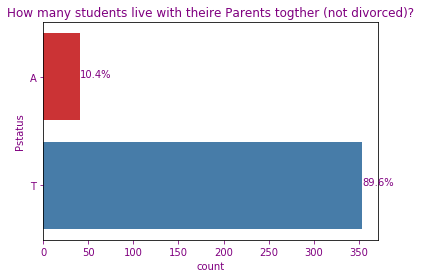

In [47]:
ax = sns.countplot(y="Pstatus", data=data ,palette="Set1")
plt.title("How many students live with theire Parents togther (not divorced)?")
plt.xlabel('count')

total = len(data['Pstatus'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

Text(0.5, 1, 'Number of people in the family: GT3 - more than 3, LE3 - less than 3')

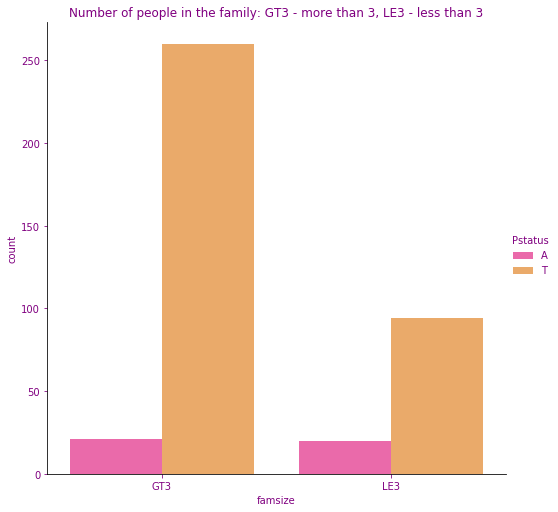

In [48]:
sns.catplot(x="famsize", kind="count",hue = "Pstatus",palette="spring", data=data, height = 7)
plt.title("Number of people in the family: GT3 - more than 3, LE3 - less than 3")

I am so happy most of the student live with their parents,  the families have more than 3 members the % of Partners be together more than families have less than 3, I think the reason for this: the Parents Didn't stay along together and This is what reduces the number of children.

In [49]:
data.Pstatus.unique()

array(['A', 'T'], dtype=object)

Text(0.5, 1.0, 'Distribution of grades for students who their parents divorced ')

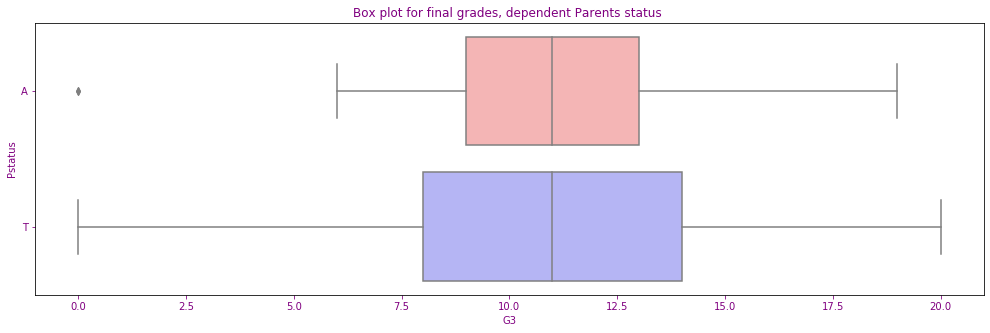

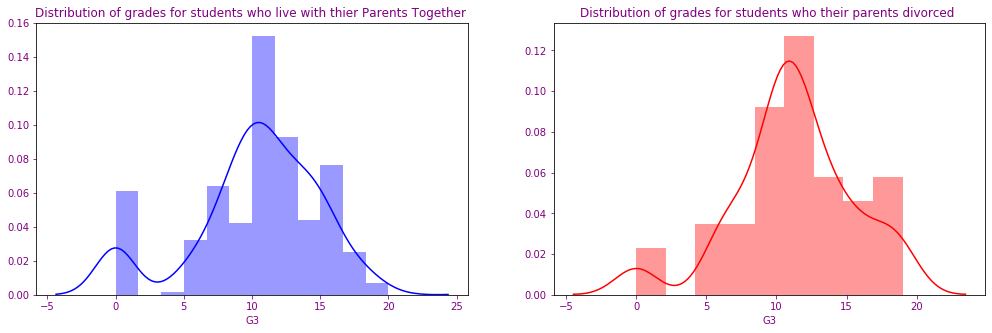

In [50]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades, dependent Parents status ")
sns.boxplot(y="Pstatus", x="G3", data = data , orient="h", palette = 'bwr_r')

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.Pstatus == 'T')]["G3"],color='blue',ax=ax)
ax.set_title('Distribution of grades for students who live with thier Parents Together ')

ax=f.add_subplot(122)
sns.distplot(data[(data.Pstatus == 'A')]['G3'],color='red',ax=ax)
ax.set_title('Distribution of grades for students who their parents divorced ')

<a id='Q10'></a>

###### Answer  Q10: when parents of students are together (not divorced) that will help them to get high grades?

>there is no tangible connection between whether students live with parents not divorced or not and the final grades rate

let's see what the students mother do ? 

In [51]:
labels = data["Mjob"].value_counts().keys().tolist()
amount = data["Mjob"].value_counts().tolist()

colors = ["orange", "green", "yellow", "white",'cyan']

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Mother's job")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pi_chart')

Most of the student's mothers work in services or other,  I wonder if the children of doctors mother get higher final grades than others or not? 

Text(0, 0.5, 'Mothers job')

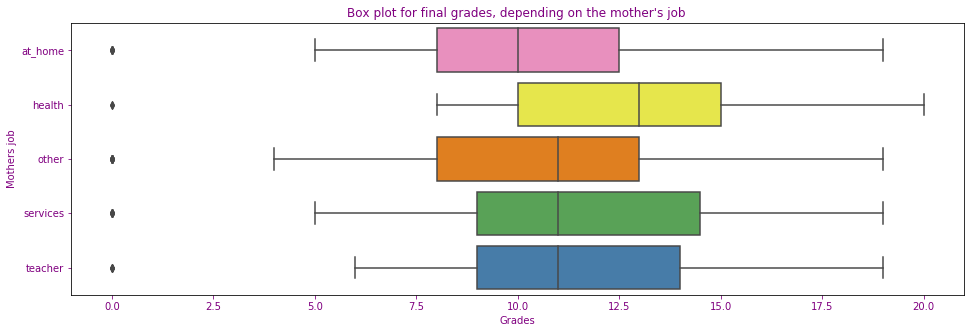

In [52]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades, depending on the mother's job ")
sns.boxplot(y="Mjob", x="G3", data = data , orient="h", palette = 'Set1_r')
plt.xlabel('Grades')
plt.ylabel('Mothers job')

it seems that mothers working in medicine instill in their children a great love for learning 

In [53]:
labels = data["Fjob"].value_counts().keys().tolist()
amount = data["Fjob"].value_counts().tolist()

colors = ["coral","lightgreen","gray","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Father's job")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pg_chart')

Same mothers Most of the student's fathers work in services or other,  I wonder if the children of doctors father get higher final grades than others or not? 

Text(0, 0.5, 'Father job')

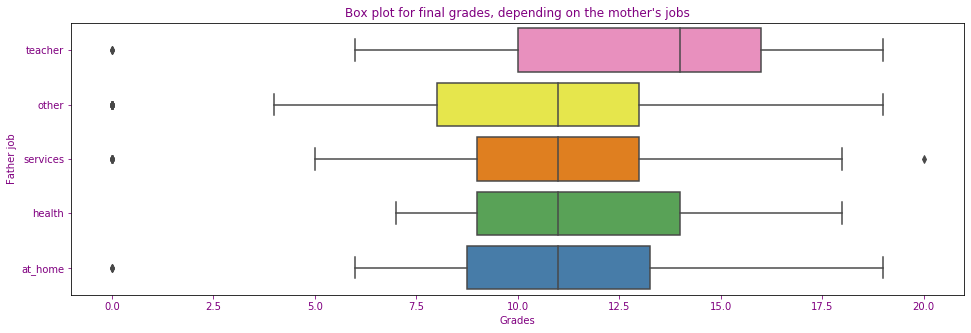

In [54]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades, depending on the mother's jobs")
sns.boxplot(y="Fjob", x="G3", data = data , orient="h", palette = 'Set1_r')
plt.xlabel('Grades')
plt.ylabel('Father job')

it seems that father working as teacher instill in their children a great love for learning 

<a id='Q3'></a>

###### Answer  Q 3 : students that get grades above than average,  what their parents working

>it seems that fathers working as teacher or mothers working in medicine  instill in their children a great love for learning 

Last but not least, the quality of family relationships 

In [55]:
labels = data["famrel"].value_counts().keys().tolist()
amount = data["famrel"].value_counts().tolist()

colors = ["pink","cyan","coral","orange","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Quality of family relationships(numeric: from 1 - very bad to 5 - excellent)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'pf_chart')

Text(0.5, 1.0, 'Distribution of grades for students who their family have very bad relationships ')

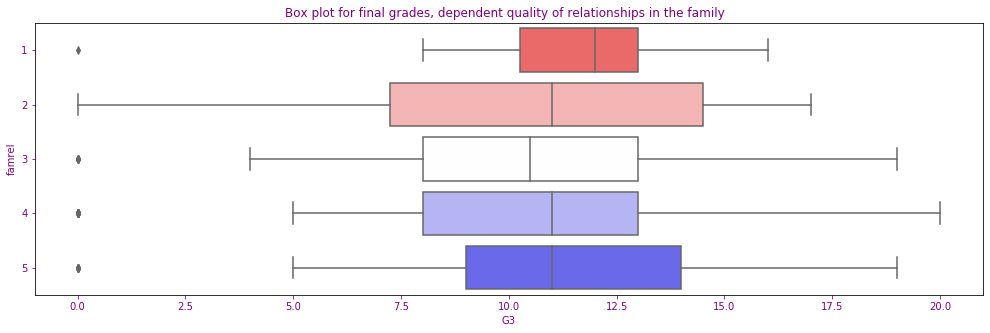

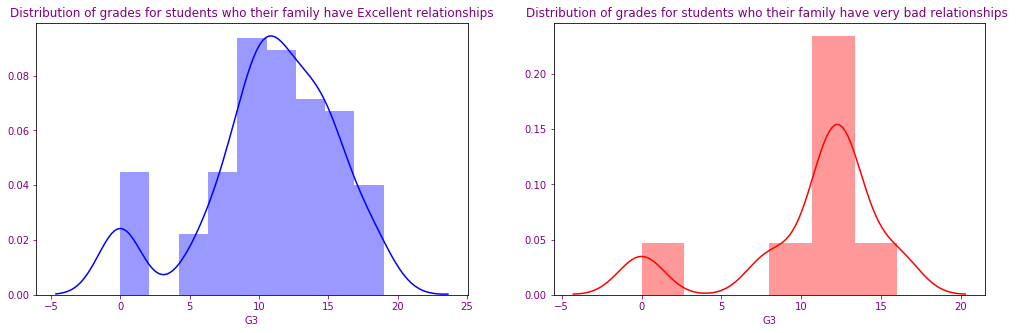

In [56]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades, dependent quality of relationships in the family  ")
sns.boxplot(y="famrel", x="G3", data = data , orient="h", palette = 'bwr_r')

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(data[(data.famrel == 5 )]["G3"],color='blue',ax=ax)
ax.set_title('Distribution of grades for students who their family have Excellent relationships')

ax=f.add_subplot(122)
sns.distplot(data[(data.famrel == 1 )]['G3'],color='red',ax=ax)
ax.set_title('Distribution of grades for students who their family have very bad relationships ')

<a id='Q11'></a>

###### Answer  Q11: when the quality of relationships in the family of students is good that will help them to get high grades? 

> I'm shocked, the student who lives with very bad relationships family get higher grades than those who live with Excellent relationships Family

###### Thank you so much for staying awake while you read my kernel :D